In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel
import pandas as pd

## Cylinder

*CYL+Chains(RW)_Rc* 
https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/cyl_rwbrush/sasfit_ff_cyl_rwbrush_rc.c

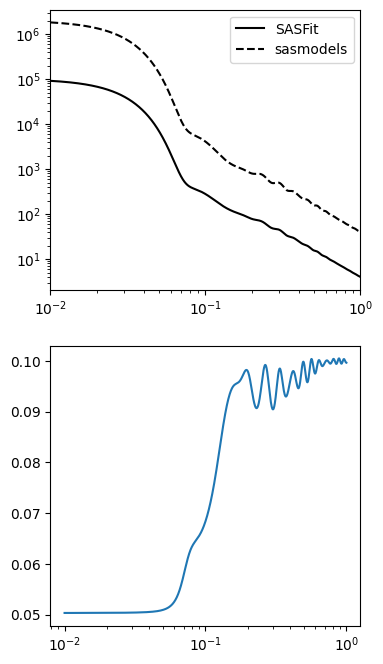

In [2]:
model = load_model("../models/cylindrical_micelle.py")

fig, axs = plt.subplots(2,1, figsize=(4*1, 4*2))
cyl_params = {'v_core' : 4000.0,    
        'v_corona' : 4000.0,
        'sld_solvent' : 1.0,
        'sld_core' : 2.0,
        'sld_corona' : 2.0,
        'radius_core': 40.0,
        'length_core' : 100.0,
        'rg': 10.0,
        'd_penetration':1.0,
        'n_aggreg' : 67.0,
        }
data_sasfit = pd.read_csv("./SASFit/version2/02_cyl_homogenous", sep=";", header=None).iloc[:,[0,1]]
q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
Iq_sasfit = data_sasfit.iloc[:,1]*0.1 # to convert into angstroms
axs[0].loglog(q, Iq_sasfit, color='k', label="SASFit")
kernel = model.make_kernel([q])
Iq_sasmodels = call_kernel(kernel, cyl_params)
axs[0].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")
axs[0].set_xlim([1e-2, 1e0])
axs[0].legend()

axs[1].plot(q, Iq_sasfit/Iq_sasmodels)
axs[1].set_xscale('log')
plt.show()